In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import glob
import os
import seaborn as sns
from pylab import *
import math
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from PIL import Image
import numpy as np
from matplotlib.mlab import PCA

In [2]:
os.chdir(r'O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v2\All_summary')

In [3]:
# read MasterDF.csv

MasterDF = pd.read_csv('MasterDF.csv')

In [18]:
CellList = list(MasterDF.CellLine.unique())
TimeList = list(MasterDF.Time.unique())
TreatmentList = list(MasterDF.Treatment.unique())

x=[2,3,4,5,6,1] + [8,9,10,11,12,7] + [14,15,16,17,18,13]


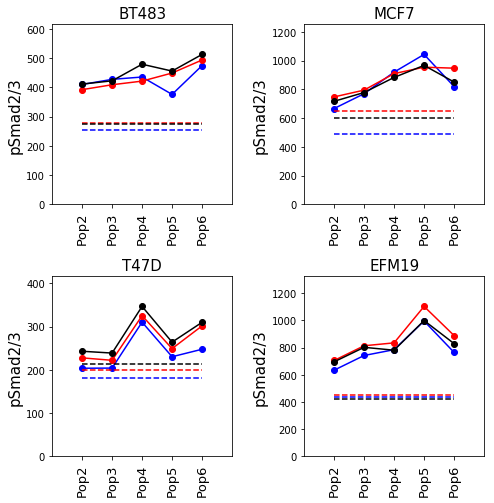

In [19]:
# Three time points

SelectedAb = 'pSmad2/3_N'
SelectedTreatment = 'Fulv'

plt.subplots(1,4,figsize=(6,6))
for k, CL in enumerate(CellList):
    
    y = list([])
    plt.subplot(2, 2, k+1)
    
    for t, time in enumerate(TimeList):
        idx = (MasterDF['CellLine']==CL) & (MasterDF['Treatment']==SelectedTreatment) & (MasterDF['Time']==time)
        y = y + list(MasterDF[idx][SelectedAb]) # y1 has six numbers (from six pop)
        
    yLim = max(y)*1.2    
    plt.plot(x[0:5],y[0:5], marker='o', c='b')
    plt.plot(x[0:5],y[6:11], marker='o', c='r')
    plt.plot(x[0:5],y[12:17], marker='o', c='k')
    
    plt.plot([2,6],[y[5], y[5]], c='b', linestyle='dashed')
    plt.plot([2,6],[y[11], y[11]], c='r', linestyle='dashed')
    plt.plot([2,6],[y[17], y[17]], c='k', linestyle='dashed')
    ax = plt.gca()
    #plt.xlabel('Population', fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=13)
    #plt.rcParams['axes.facecolor'] = 'g'
    string = SelectedAb[:-2]
    plt.ylabel(string, fontsize=15)
    plt.ylim([0, yLim])
    plt.xlim([1, 7])
    m=k+1
    plt.title(CL, fontsize=15)
    xticks(np.arange(2,7), ( 'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6'))

subplots_adjust(left=1, bottom=1, right=2, top=2,
                wspace=0.4, hspace=0.4)
plt.show()
                                                                                                 

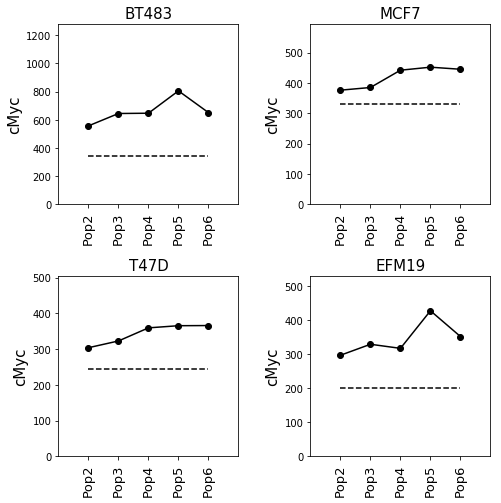

In [20]:
# Mean of three dates

SelectedAb = 'cMyc_N'
color =['k', 'r']

plt.subplots(1,4,figsize=(6,6))


for i, SelectedTreatment in  enumerate(['Fulv']):
    for k, CL in enumerate(CellList):

        y = list([])
        plt.subplot(2, 2, k+1)

        for t, time in enumerate(TimeList):
            idx = (MasterDF['CellLine']==CL) & (MasterDF['Treatment']==SelectedTreatment) & (MasterDF['Time']==time)
            y = y + list(MasterDF[idx][SelectedAb]) # y1 has six numbers (from six pop)

        yLim = max(y)*1.2    
        plt.plot(x[0:5], (np.array(y[0:5]) + np.array(y[6:11]) + np.array(y[12:17]))/3, marker='o', c=color[i])

        plt.plot([2,6],[ np.mean(np.array([y[5], y[11], y[17]])), np.mean(np.array([y[5], y[11], y[17]])) ], c=color[i], linestyle='dashed')    

        ax = plt.gca()
        #plt.xlabel('Population', fontsize=15)
        plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=13)
        #plt.rcParams['axes.facecolor'] = 'g'
        string = SelectedAb[:-2]
        plt.ylabel(string, fontsize=15)
        plt.ylim([0, yLim])
        plt.xlim([1, 7])
        m=k+1
        plt.title(CL, fontsize=15)
        xticks(np.arange(2,7), ( 'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6'))

    subplots_adjust(left=1, bottom=1, right=2, top=2,
                    wspace=0.4, hspace=0.4)

plt.show()
             

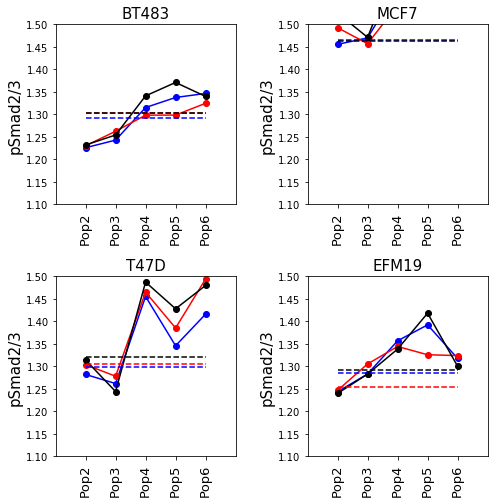

In [21]:
# Nuc/Cyto ratio
SelectedAb = 'pSmad2/3_N'
SelectedAb2 = 'pSmad2/3_C'
SelectedTreatment = 'Fulv'

plt.subplots(1,4,figsize=(6,6))


for k, CL in enumerate(CellList):
    
    y = list([])
    plt.subplot(2, 2, k+1)
    
    for t, time in enumerate(TimeList):
        idx = (MasterDF['CellLine']==CL) & (MasterDF['Treatment']==SelectedTreatment) & (MasterDF['Time']==time)
        y = y + list(MasterDF[idx][SelectedAb]/MasterDF[idx][SelectedAb2]) # y1 has six numbers (from six pop)
        
        
    yLim = max(y)*1.2    
    plt.plot(x[0:5],y[0:5], marker='o', c='b')
    plt.plot(x[0:5],y[6:11], marker='o', c='r')
    plt.plot(x[0:5],y[12:17], marker='o', c='k')
    
    plt.plot([2,6],[y[5], y[5]], c='b', linestyle='dashed')
    plt.plot([2,6],[y[11], y[11]], c='r', linestyle='dashed')
    plt.plot([2,6],[y[17], y[17]], c='k', linestyle='dashed')
    ax = plt.gca()
    #plt.xlabel('Population', fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=13)
    #plt.rcParams['axes.facecolor'] = 'g'
    string = SelectedAb[:-2]
    plt.ylabel(string, fontsize=15)
    plt.ylim([1.1,1.5])
    plt.xlim([1, 7])
    m=k+1
    plt.title(CL, fontsize=15)
    xticks(np.arange(2,7), ( 'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6'))

subplots_adjust(left=1, bottom=1, right=2, top=2,
                wspace=0.4, hspace=0.4)

plt.show()

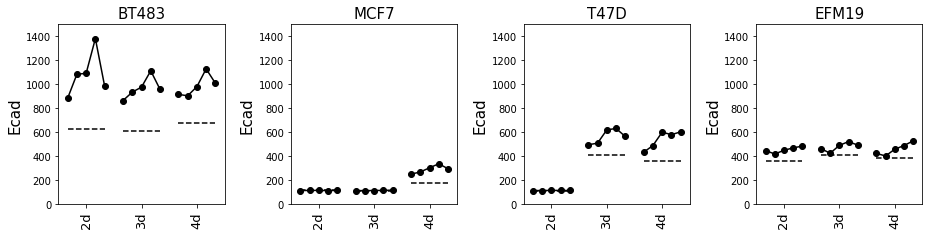

In [89]:
# Nuc/Cyto ratio
SelectedAb = 'Ecad_C'
SelectedTreatment = 'DMSO'

plt.subplots(1,4,figsize=(12,2.5))


for k, CL in enumerate(CellList):
    
    y = list([])
    plt.subplot(1, 4, k+1)
    
    for t, time in enumerate(TimeList):
        idx = (MasterDF['CellLine']==CL) & (MasterDF['Treatment']==SelectedTreatment) & (MasterDF['Time']==time)
        y = y + list(MasterDF[idx][SelectedAb]) # y1 has six numbers (from six pop)
        
        
    yLim = max(y)*1.2    
    plt.plot(x[0:5],y[0:5], marker='o', c='k')
    plt.plot(x[6:11],y[6:11], marker='o', c='k')
    plt.plot(x[12:17],y[12:17], marker='o', c='k')
    
    plt.plot([2,6],[y[5], y[5]], c='k', linestyle='dashed')
    plt.plot([8,12],[y[11], y[11]], c='k', linestyle='dashed')
    plt.plot([14,18],[y[17], y[17]], c='k', linestyle='dashed')
    ax = plt.gca()
    #plt.xlabel('Population', fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=13)
    #plt.rcParams['axes.facecolor'] = 'g'
    string = SelectedAb[:-2]
    plt.ylabel(string, fontsize=15)
    plt.ylim([0, 1500])
    plt.xlim([1, 19])
    m=k+1
    plt.title(CL, fontsize=15)
    xticks(np.arange(4,17,6), ('2d', '3d', '4d'))

subplots_adjust(left=1, bottom=1, right=2, top=2,
                wspace=0.4, hspace=0.4)

plt.show()

In [29]:
np.arange(2,14,6)

array([2, 8])

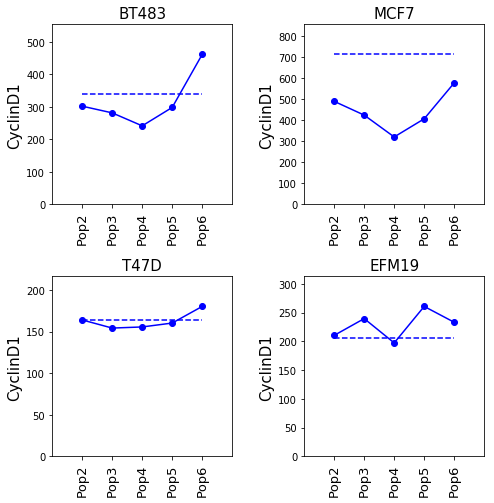

In [11]:
SelectedAb = 'CyclinD1_N'
SelectedTreatment = 'DMSO'

plt.subplots(1,4,figsize=(6,6))


for k, CL in enumerate(CellList):
    
    y = list([])
    plt.subplot(2, 2, k+1)
    
    for time in ['4d']:
        idx = (MasterDF['CellLine']==CL) & (MasterDF['Treatment']==SelectedTreatment) & (MasterDF['Time']==time)
        y = y + list(MasterDF[idx][SelectedAb]) # y1 has six numbers (from six pop)
        
    yLim = max(y)*1.2    
    plt.plot(x[0:5],y[0:5], marker='o', c='b')
    #plt.plot(x[0:5],y[6:11], marker='o', c='r')
    #plt.plot(x[0:5],y[12:17], marker='o', c='k')
    
    plt.plot([2,6],[y[5], y[5]], c='b', linestyle='dashed')
    #plt.plot([2,6],[y[11], y[11]], c='r', linestyle='dashed')
    #plt.plot([2,6],[y[17], y[17]], c='k', linestyle='dashed')
    ax = plt.gca()
    #plt.xlabel('Population', fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=13)
    #plt.rcParams['axes.facecolor'] = 'g'
    string = SelectedAb[:-2]
    plt.ylabel(string, fontsize=15)
    plt.ylim([0, yLim])
    plt.xlim([1, 7])
    m=k+1
    plt.title(CL, fontsize=15)
    xticks(np.arange(2,7), ( 'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6'))

subplots_adjust(left=1, bottom=1, right=2, top=2,
                wspace=0.4, hspace=0.4)

plt.show()

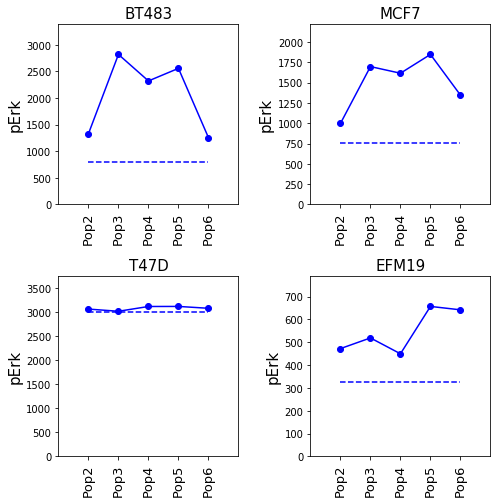

In [12]:
SelectedAb = 'pErk_N'
SelectedTreatment = 'DMSO'

plt.subplots(1,4,figsize=(6,6))


for k, CL in enumerate(CellList):
    
    y = list([])
    plt.subplot(2, 2, k+1)
    
    for time in ['2d', '4d']:
        idx = (MasterDF['CellLine']==CL) & (MasterDF['Treatment']==SelectedTreatment) & (MasterDF['Time']==time)
        y = y + list(MasterDF[idx][SelectedAb]) # y1 has six numbers (from six pop)
        
    yLim = max(y)*1.2    
    plt.plot(x[0:5],y[0:5], marker='o', c='b')
    #plt.plot(x[0:5],y[6:11], marker='o', c='r')
    #plt.plot(x[0:5],y[12:17], marker='o', c='k')
    
    plt.plot([2,6],[y[5], y[5]], c='b', linestyle='dashed')
    #plt.plot([2,6],[y[11], y[11]], c='r', linestyle='dashed')
    #plt.plot([2,6],[y[17], y[17]], c='k', linestyle='dashed')
    ax = plt.gca()
    #plt.xlabel('Population', fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=13)
    #plt.rcParams['axes.facecolor'] = 'g'
    string = SelectedAb[:-2]
    plt.ylabel(string, fontsize=15)
    plt.ylim([0, yLim])
    plt.xlim([1, 7])
    m=k+1
    plt.title(CL, fontsize=15)
    xticks(np.arange(2,7), ( 'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6'))

subplots_adjust(left=1, bottom=1, right=2, top=2,
                wspace=0.4, hspace=0.4)

plt.show()